<a href="https://colab.research.google.com/github/ethender/KaggleCompetitions/blob/digit/2022_06_19_digitrecognizer_er/CODE/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def getEnviornment():
  if 'google.colab' in str(get_ipython()):
    return 'colab'
  else:
    return 'jupyter'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [5]:
if getEnviornment() == 'colab':
  data = pd.read_csv('https://raw.githubusercontent.com/ethender/KaggleCompetitions/digit/2022_06_19_digitrecognizer_er/DATA/train.csv')
else:
  data = pd.read_csv('../DATA/train.csv')

In [6]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_x = data.iloc[:,1:].values.astype('float32')
train_y = data.iloc[:,0].values.astype('int32')

In [8]:
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
train_y

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [10]:
#train_y = tf.keras.utils.to_categorical(train_y)

In [11]:
train_y

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [12]:
train_x = train_x/255.0

(-0.5, 27.5, 27.5, -0.5)

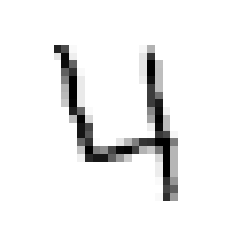

In [13]:
import matplotlib as mat
import matplotlib.pyplot as plt


plt.imshow(train_x[3].reshape(28,28),cmap=mat.cm.binary)
plt.axis("off")

In [14]:
train_x.shape

(42000, 784)

In [15]:
train_x = train_x.reshape(train_x.shape[0], 28, 28,1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_validate,y_train,y_validate = train_test_split(train_x,train_y,test_size=0.3)

# Tensorflow Implementation

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

# Flatten

In [20]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_validate, y_validate))

Epoch 1/10
919/919 [==============================] - 44s 46ms/step - loss: 0.2259 - accuracy: 0.9276 - val_loss: 0.0880 - val_accuracy: 0.9707
Epoch 2/10
919/919 [==============================] - 38s 42ms/step - loss: 0.0619 - accuracy: 0.9797 - val_loss: 0.0573 - val_accuracy: 0.9813
Epoch 3/10
919/919 [==============================] - 34s 37ms/step - loss: 0.0425 - accuracy: 0.9867 - val_loss: 0.0497 - val_accuracy: 0.9842
Epoch 4/10
919/919 [==============================] - 35s 38ms/step - loss: 0.0323 - accuracy: 0.9896 - val_loss: 0.0672 - val_accuracy: 0.9810
Epoch 5/10
919/919 [==============================] - 34s 37ms/step - loss: 0.0247 - accuracy: 0.9925 - val_loss: 0.0418 - val_accuracy: 0.9877
Epoch 6/10
919/919 [==============================] - 33s 36ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.0518 - val_accuracy: 0.9863
Epoch 7/10
919/919 [==============================] - 33s 36ms/step - loss: 0.0166 - accuracy: 0.9943 - val_loss: 0.0587 - val_accuracy:

## Evaluate the model

394/394 - 4s - loss: 0.0491 - accuracy: 0.9879 - 4s/epoch - 9ms/step


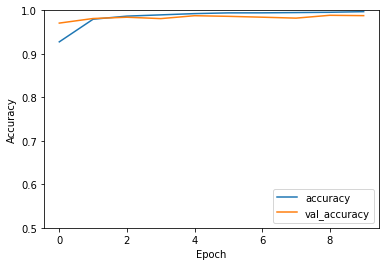

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_validate,  y_validate, verbose=2)

In [25]:
print(test_acc)

0.9878571629524231


In [36]:
if getEnviornment() == 'colab':
  test_data = pd.read_csv('https://raw.githubusercontent.com/ethender/KaggleCompetitions/digit/2022_06_19_digitrecognizer_er/DATA/test.csv')
else:
  test_data = pd.read_csv('../DATA/test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## processing the test data

In [37]:
test_data = test_data.values.astype('float32')

In [38]:
test_data = test_data/255.0

(-0.5, 27.5, 27.5, -0.5)

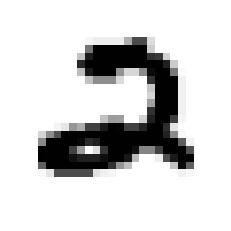

In [39]:
plt.imshow(test_data[0].reshape(28,28),cmap=mat.cm.binary)
plt.axis("off")

In [40]:
test_data = test_data.reshape(test_data.shape[0],28,28,1)

In [41]:
test_data_predict = model.predict(test_data)

In [45]:
test_data_predict = np.argmax(test_data_predict,axis=1)

In [46]:
test_data_predict[0]

2